# Descriptive Analytics

In [107]:
# requirements
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in the Data

In [108]:
df = pd.read_csv('data/listings.csv')

C:\Users\micha\AppData\Local\Temp\ipykernel_18136\3800788481.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/listings.csv')


In [109]:
df = pd.DataFrame(df)
df.head()

,ID,Name,Host_ID,Host_Name,Neighborhood_Group,Neighbourhood,Latitude,Longitude,Room_Type,Price,...,Last_Review,Reviews_per_Month,Calculated_Host_Listings_Count,Availability_365,Number_of_Reviews_LTM,Llicense,City,State,MedianIncome,MedianAge
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,120,...,11/30/2019,0.71,2,344,0,NaN,Asheville,NC,49809,39.0
1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,...,12/5/2021,2.75,7,244,68,NaN,Asheville,NC,49809,39.0
2,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,...,1/1/2020,0.54,7,0,0,NaN,Asheville,NC,49809,39.0
3,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Shared room,33,...,11/14/2021,2.36,7,262,15,NaN,Asheville,NC,49809,39.0
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,...,10/19/2015,0.46,1,0,0,NaN,Asheville,NC,49809,39.0


In [110]:
# Dropping unwanted columns

df_analysis = df.drop(['ID', 'Name', 'Host_ID', 'Host_Name', 'Neighborhood_Group', 'Neighbourhood', 'Last_Review', 'Llicense'], axis=1)

In [111]:
df_analysis.head()

,Latitude,Longitude,Room_Type,Price,Minimum_Nights,Number_of_Reviews,Reviews_per_Month,Calculated_Host_Listings_Count,Availability_365,Number_of_Reviews_LTM,City,State,MedianIncome,MedianAge
0,35.60670,-82.55563,Entire home/apt,120,30,89,0.71,2,344,0,Asheville,NC,49809,39.0
1,35.57864,-82.59578,Entire home/apt,90,1,347,2.75,7,244,68,Asheville,NC,49809,39.0
2,35.57864,-82.59578,Private room,66,1,67,0.54,7,0,0,Asheville,NC,49809,39.0
3,35.57864,-82.59578,Shared room,33,1,296,2.36,7,262,15,Asheville,NC,49809,39.0
4,35.61442,-82.54127,Private room,125,30,58,0.46,1,0,0,Asheville,NC,49809,39.0


In [112]:
le = LabelEncoder()

# Room_Type
room_type = le.fit_transform(df_analysis['Room_Type'])
le.fit(df_analysis['Room_Type'])
df_room_type_key = pd.DataFrame(le.classes_)

# City
city = le.fit_transform(df_analysis['City'])
le.fit(df_analysis['City'])
df_city_key = pd.DataFrame(le.classes_)

# State
state = le.fit_transform(df_analysis['State'])
le.fit(df_analysis['State'])
df_state_key = pd.DataFrame(le.classes_)

In [113]:
from IPython.display import display, HTML
from IPython.display import display_html

df1_styler = df_room_type_key.style.set_table_attributes("style='display:inline-block; vertical-align: top'").set_caption('Room Type')
df2_styler = df_city_key.style.set_table_attributes("style='display:inline-block; vertical-align: top'").set_caption('City')
df3_styler = df_state_key.style.set_table_attributes("style='display:inline-block; vertical-align: top'").set_caption('State')
 
display_html(df1_styler._repr_html_()+ df2_styler._repr_html_() + df3_styler._repr_html_(), raw=True)

,0
0,Entire home/apt
1,Hotel room
2,Private room
3,Shared room
,0
0,Asheville
1,Austin
2,Boston
3,Broward County
4,Cambridge


In [114]:
df_analysis.drop(['Room_Type', 'City', 'State'], axis=1)
df_analysis['Room_Type'] = room_type
df_analysis['City'] = city
df_analysis['State'] = state

### Exploratory Analysis

<AxesSubplot:>

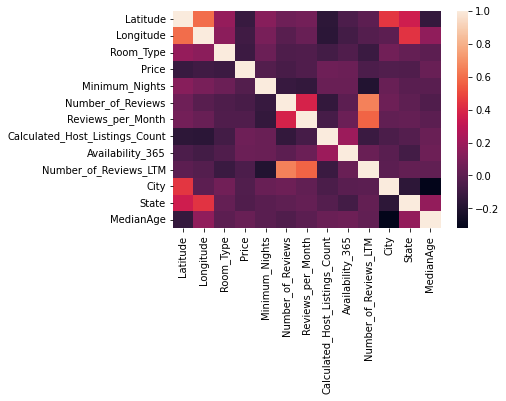

In [115]:
# Correlation Matrix
sns.heatmap(df_analysis.corr(), cmap='rocket')

### Feature Modeling Data Preparation

In [116]:
# Get Room Dummies
rooms = pd.get_dummies(df['Room_Type'], prefix='Room')
df = pd.concat([df, rooms], axis=0).drop('Room_Type', axis=1)

# Get City Dummies
city = pd.get_dummies(df['City'], prefix='City')
df = pd.concat([df, city], axis=0).drop('City', axis=1)

# Get State Dummies
state = pd.get_dummies(df['State'], prefix='State')
df = pd.concat([df, state], axis=0).drop('State', axis=1)

### Histograms of Features

[Text(0.5, 0, 'Room Type'),
 Text(0.5, 1.0, 'Room Type Frequency'),
 (-0.5, 3.5),

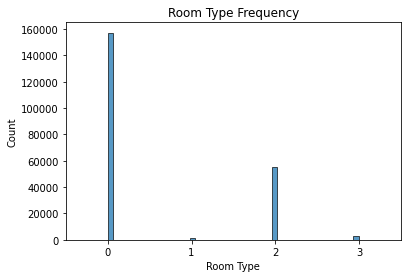

In [117]:
Room_Type_Plot = sns.histplot(data = df_analysis, x = "Room_Type")
Room_Type_Plot.set(xlabel = "Room Type", title = "Room Type Frequency", xlim=(-.5,3.5), xticks=(0,1,2,3))
# Cannot figure out how to change the width for the life of me

[Text(0.5, 1.0, 'Histogram of One-Night Price')]

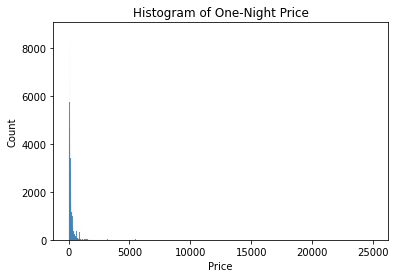

In [118]:
Price_Plot = sns.histplot(data = df_analysis, x = "Price")
Price_Plot.set(title = "Histogram of One-Night Price")

# Obviously some outliers here

[Text(0.5, 1.0, 'Histogram of One-Night Price'), (0.0, 1500.0)]

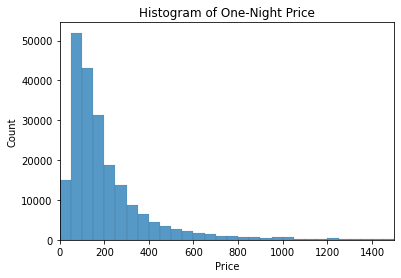

In [119]:
Price_Plot = sns.histplot(data = df_analysis, x = "Price", bins = 500)
Price_Plot.set(title = "Histogram of One-Night Price", xlim=(0,1500))

# Narrowing down the axis limits for visualization 

[Text(0.5, 0, 'Room Type'), Text(0.5, 1.0, 'Price by Room Type')]

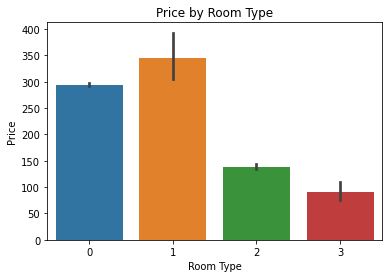

In [120]:
Room_Type_Price_Plot = sns.barplot(data=df_analysis, x="Room_Type", y="Price")
Room_Type_Price_Plot.set(xlabel = "Room Type", title = "Price by Room Type")

[Text(0.5, 0, 'City'),
 Text(0.5, 1.0, 'City Frequency'),
 (-0.5, 27.5),

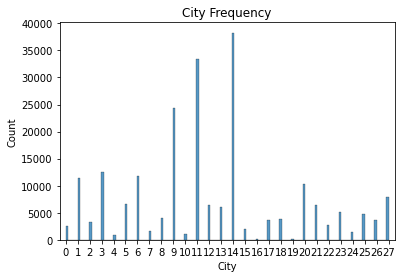

In [121]:
City_Plot = sns.histplot(data = df_analysis, x = "City")
City_Plot.set(xlabel = "City", title = "City Frequency", xlim=(-.5,27.5), xticks=(range(28)))

[Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'State Frequency'),
 (-0.5, 18.5),

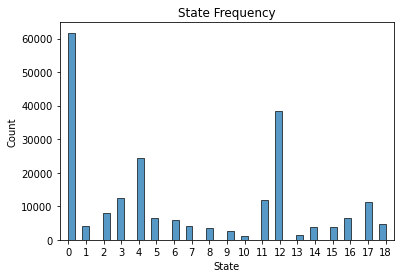

In [122]:
State_Plot = sns.histplot(data = df_analysis, x = "State")
State_Plot.set(xlabel = "State", title = "State Frequency", xlim=(-.5,18.5), xticks=(range(19)))